In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/train"
test_path="/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/test"
val_path="/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/validation"

In [ ]:
DIRECTORY=r'/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/train'
categories = ['Other','Paddy']


 OTHER


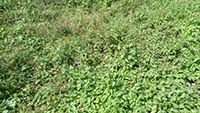

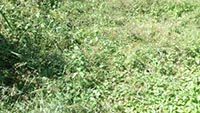

there are  1014  images in  Other class

 PADDY


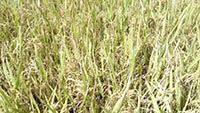

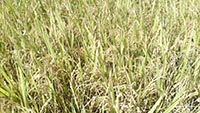

there are  958  images in  Paddy class


In [ ]:
from IPython.display import Image, display
from pathlib import Path
import os
num = []
for category in categories:
    path = '//content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/train/{0}/'.format(category)
    folder_data = os.listdir(path)
    k = 0
    print('\n', category.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', category, 'class')

In [ ]:
DIRECTORY=r'//content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/test'
categories = ['Other','Paddy']


 OTHER


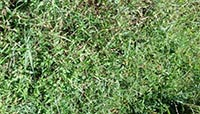

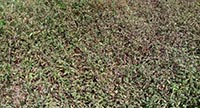

there are  318  images in  Other class

 PADDY


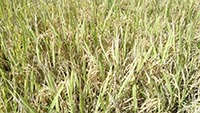

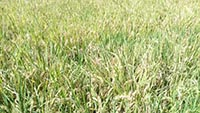

there are  316  images in  Paddy class


In [ ]:
from IPython.display import Image, display
from pathlib import Path
import os
num = []
for category in categories:
    path = '/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/test/{0}/'.format(category)
    folder_data = os.listdir(path)
    k = 0
    print('\n', category.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', category, 'class')

In [ ]:
DIRECTORY=r'/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/validation'
categories = ['Other','Paddy']


 OTHER


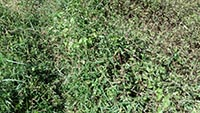

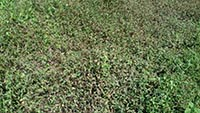

there are  300  images in  Other class

 PADDY


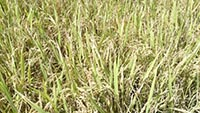

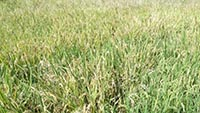

there are  316  images in  Paddy class


In [ ]:
from IPython.display import Image, display
from pathlib import Path
import os
num = []
for category in categories:
    path ='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/validation/{0}/'.format(category)
    folder_data = os.listdir(path)
    k = 0
    print('\n', category.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', category, 'class')

In [ ]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [ ]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [ ]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1972 images belonging to 2 classes.
Found 634 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Other': 0, 'Paddy': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((1972,), (634,), (616,))

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=5,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/5
62/62 [==============================] - 1635s 26s/step - loss: 0.1005 - accuracy: 0.9589 - val_loss: 8.0653e-04 - val_accuracy: 1.0000
Epoch 2/5
62/62 [==============================] - 1637s 27s/step - loss: 9.0740e-04 - accuracy: 1.0000 - val_loss: 6.4772e-04 - val_accuracy: 1.0000
Epoch 3/5
62/62 [==============================] - 1627s 26s/step - loss: 7.2590e-04 - accuracy: 1.0000 - val_loss: 5.6393e-04 - val_accuracy: 1.0000
Epoch 4/5
62/62 [==============================] - 1632s 26s/step - loss: 6.1065e-04 - accuracy: 1.0000 - val_loss: 4.7881e-04 - val_accuracy: 1.0000
Epoch 5/5
62/62 [==============================] - 1630s 26s/step - loss: 5.1827e-04 - accuracy: 1.0000 - val_loss: 3.9245e-04 - val_accuracy: 1.0000


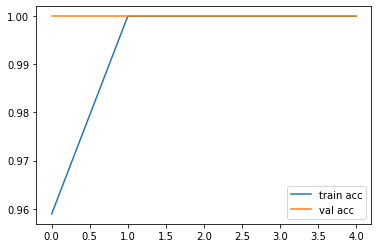

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

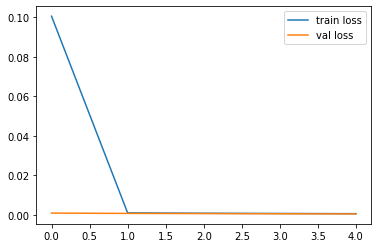

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

20/20 [==============================] - 403s 20s/step - loss: 11.1832 - accuracy: 0.0032


[11.183161735534668, 0.0031545741949230433]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       318
           1       0.00      0.00      0.00       316

    accuracy                           0.00       634
   macro avg       0.00      0.00      0.00       634
weighted avg       0.00      0.00      0.00       634



In [ ]:
print(confusion_matrix(y_pred,test_y))

[[  2 316]
 [316   0]]


In [ ]:
import os
os.chdir('/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images')

In [ ]:
!dir

test  train  validation  vgg-loss-rps-1.png


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator

keras.preprocessing.image.ImageDataGenerator

In [ ]:
train_aumentation = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

In [ ]:
train_generator = train_aumentation .flow_from_directory(directory='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/train',
                                                         target_size =(224,224),
                                                         batch_size = 128,
                                                         class_mode= 'binary')

Found 1972 images belonging to 2 classes.


In [ ]:
validation_aumentation = ImageDataGenerator(rescale=1./255)

In [ ]:
test_augmentation=ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_augmentation .flow_from_directory(directory='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/test',
                                                         target_size =(224,224),
                                                         batch_size = 128,
                                                         class_mode= 'binary')

Found 634 images belonging to 2 classes.


In [ ]:
validation_generator = validation_aumentation .flow_from_directory(directory='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/validation',
                                                         target_size =(224,224),
                                                         batch_size = 128,
                                                         class_mode= 'binary')

Found 616 images belonging to 2 classes.


In [ ]:
import tensorflow
model=tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.InputLayer(input_shape=(224,224,3)))
model.add(tensorflow.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model.add(tensorflow.keras.layers.Dropout(0.20))
model.add(tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2,2))
#model.add(tensorflow.keras.layers.Dropout(0.50))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(512,activation='relu'))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid'))


In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_y=train_generator.classes
test_y=test_generator.classes
val_y=validation_generator.classes

In [ ]:
train_generator.class_indices

{'Other': 0, 'Paddy': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((1972,), (634,), (616,))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 111, 111, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)            

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=12,verbose=1,validation_data=validation_generator)

Epoch 1/12
8/8 [==============================] - 74s 9s/step - loss: 4.9099 - accuracy: 0.4746 - val_loss: 0.6778 - val_accuracy: 0.5536
Epoch 2/12
8/8 [==============================] - 67s 8s/step - loss: 0.8009 - accuracy: 0.5886 - val_loss: 0.6329 - val_accuracy: 0.6169
Epoch 3/12
8/8 [==============================] - 72s 9s/step - loss: 0.3821 - accuracy: 0.7881 - val_loss: 0.6288 - val_accuracy: 0.6623
Epoch 4/12
8/8 [==============================] - 72s 9s/step - loss: 0.2822 - accuracy: 0.8838 - val_loss: 0.3479 - val_accuracy: 0.8458
Epoch 5/12
8/8 [==============================] - 73s 9s/step - loss: 0.1631 - accuracy: 0.9541 - val_loss: 0.2037 - val_accuracy: 0.9123
Epoch 6/12
8/8 [==============================] - 83s 10s/step - loss: 0.0808 - accuracy: 0.9844 - val_loss: 0.1211 - val_accuracy: 0.9594
Epoch 7/12
8/8 [==============================] - 71s 9s/step - loss: 0.0786 - accuracy: 0.9746 - val_loss: 0.1390 - val_accuracy: 0.9334
Epoch 8/12
8/8 [=================

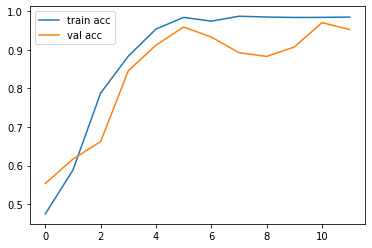

In [ ]:
# accuracies
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.show()

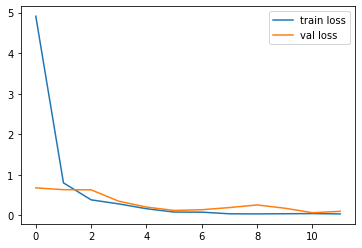

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

20/20 [==============================] - 8s 406ms/step - loss: 0.6931 - accuracy: 0.4716


[0.6931412816047668, 0.47160884737968445]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125)    #Also try nearest, constant, reflect, wrap

In [ ]:
dataset = []

import numpy as np
from skimage import io
import os
from PIL import Image

image_directory = '/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images/train'
SIZE = 128
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[0] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

#Let us save images to get a feel for the augmented images.
#Create an iterator either by using image dataset in memory (using flow() function)
#or by using image dataset from a directory (using flow_from_directory)
#from directory can beuseful if subdirectories are organized by class

# Generating and saving 10 augmented samples
# using the above defined parameters.
#Again, flow generates batches of randomly augmented images
"""
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir='augmented',
                          save_prefix='aug',
                          save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
"""


#####################################################################
#Multiclass. Read dirctly from the folder structure using flow_from_directory

i = 0
for batch in datagen.flow_from_directory(directory='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/images',
                                         batch_size=16,
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir='/content/drive/MyDrive/weedandpaddy (3)/weedandpaddy (1)/images/augmented',
                                         save_prefix='aug',
                                         save_format='jpg'):
    i += 1
    if i > 100:
        break

Found 3222 images belonging to 3 classes.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)
clf = MultinomialNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
target_names =['0','1']
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       581
           1       0.89      0.97      0.93        88

    accuracy                           0.98       669
   macro avg       0.94      0.97      0.96       669
weighted avg       0.98      0.98      0.98       669



In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
print(confusion_matrix(y_test,predictions))

[[571  10]
 [  3  85]]


In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
accuracy(cm)

In [ ]:
accuracy(cm)

0.9503833333333334